In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, precision_score, roc_auc_score, accuracy_score

In [26]:
df = pd.read_csv("IM_after_preproc.csv")

#Меня не устраивает что  в train_test_split может в тестовую выборку попасть 0 инфарктов или все 100
#поэтому разделю вручную и соеденю после деления обратно
df_heartattack_x = df[df['IM']==1].iloc[:, 1:]
df_heartattack_y = df[df['IM']==1].iloc[:, 0]
df_no_heartattack_x = df[df['IM']==0].iloc[:, 1:]
df_no_heartattack_y = df[df['IM']==0].iloc[:, 0]

df_heartattack_x_train, df_heartattack_x_test, df_heartattack_y_train, df_heartattack_y_test = train_test_split(df_heartattack_x, df_heartattack_y, test_size=0.2)
df_no_heartattack_x_train, df_no_heartattack_x_test, df_no_heartattack_y_train, df_no_heartattack_y_test = train_test_split(df_no_heartattack_x, df_no_heartattack_y, test_size=0.2)

x_train = pd.concat((df_heartattack_x_train, df_no_heartattack_x_train), axis=0)
y_train = pd.concat((df_heartattack_y_train, df_no_heartattack_y_train), axis=0)
x_test = pd.concat((df_heartattack_x_test, df_no_heartattack_x_test), axis=0)
y_test = pd.concat((df_heartattack_y_test, df_no_heartattack_y_test), axis=0)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)#любое значение n_neighbors  до 4 даст одинаковый ответ, после 4 recall падает
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
print("recall: "+str(recall_score(y_test, y_pred)))
print("roc_auc_score: "+str(roc_auc_score(y_test, y_pred)))
print("precision: "+str(precision_score(y_test, y_pred)))
print("accuracy_score: "+str(accuracy_score(y_test, y_pred)))
print("Доля обектов отнесеных к классу 1 от тестовой выборки: "+str(round((sum(matrix[:, 1])/x_test.shape[0])*100))+'%')

[[69 12]
 [23 17]]
recall: 0.425
roc_auc_score: 0.638425925925926
precision: 0.5862068965517241
accuracy_score: 0.7107438016528925
Доля обектов отнесеных к классу 1 от тестовой выборки: 24%


e:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN

In [28]:
model.predict_proba(x_test)

array([[0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.

In [33]:
from tqdm import tqdm

prediction = model.predict_proba(x_test)
threshold_results = {'threshold':[], 'test_recall_score':[], 'test_f1_score':[], 'test_precision_score':[]}
iters = prediction[:, 1].copy()
iters.sort()
iters = np.unique(iters)

for i in tqdm(iters):
    predict_mine = []
    for i2 in prediction:
        if i2[1]>i:
            predict_mine.append(1)
        else:
            predict_mine.append(0)
            
    threshold_results['threshold'].append(i)
    threshold_results['test_recall_score'].append(recall_score(y_test, predict_mine))
    threshold_results['test_f1_score'].append(f1_score(y_test, predict_mine))
    threshold_results['test_precision_score'].append(precision_score(y_test, predict_mine))

  0%|          | 0/4 [00:00<?, ?it/s]e:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 4/4 [00:00<00:00, 266.83it/s]


In [34]:
df_threshold_results = pd.DataFrame(threshold_results)
df_threshold_results

,threshold,test_recall_score,test_f1_score,test_precision_score
0,0.000000,0.825,0.628571,0.507692
1,0.333333,0.425,0.492754,0.586207
2,0.666667,0.075,0.133333,0.600000
3,1.000000,0.000,0.000000,0.000000


Text(0, 0.5, 'метрика')

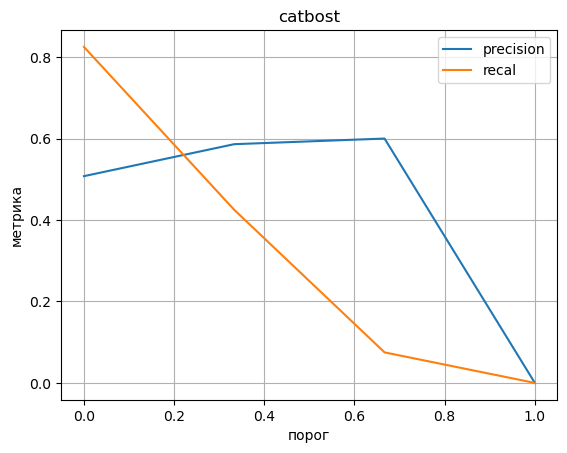

In [35]:
import matplotlib.pyplot as plt
plt.plot(df_threshold_results['threshold'], df_threshold_results['test_precision_score'], label='precision')
plt.plot(df_threshold_results['threshold'], df_threshold_results['test_recall_score'], label='recal')
plt.grid()
plt.legend()
plt.title('catbost')
plt.xlabel('порог')
plt.ylabel('метрика')